# 기본적 (단일) 연결 리스트(Singly Linked List)
- Node: 데이터 저장 단위(데이터값, 링크)로 구성
    - Data
    - Link(next) == Pointer: 각 노드 안에서, 다음이나 이전의 노드의 위치 정보를 가지고 있다.
- 대표적인 선형 자료구조 중 하나로 다양한 추상 자료형(Abstract Data Structures)의 기반이 된다.
- 배열과 달리 물리적으로 연속적이지 않지만 논리적으로 연결돼있다.
- Node내의 데이터는 다른 구조로 이루어질 수 있다.
ex) 문자열, 레코드, 또 다른 연결 리스트 등

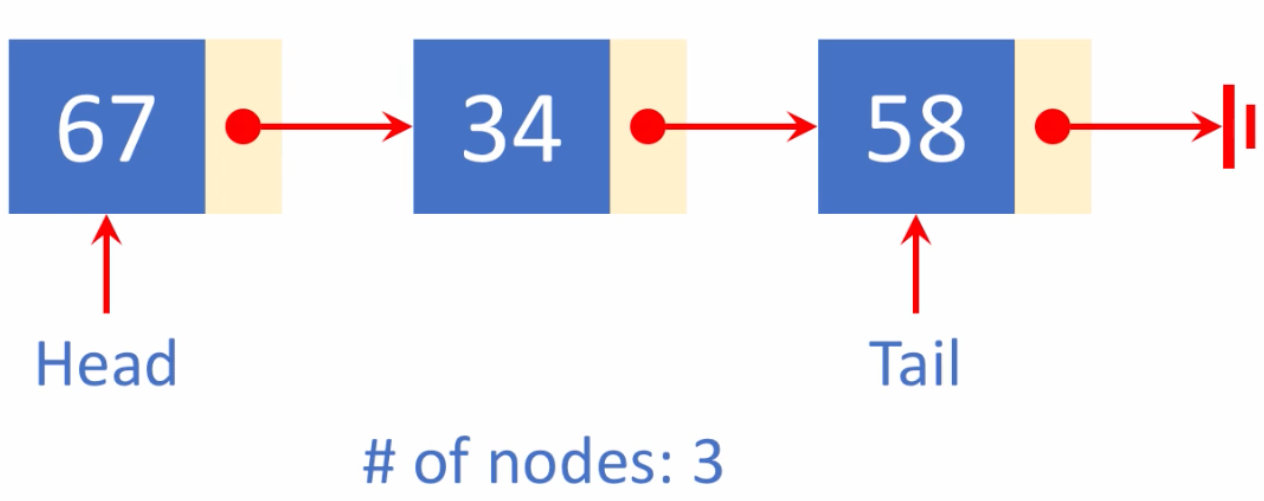

# 연결 리스트 시간 복잡도
1. 원소 조회: O(n)
2. 원소 삽입
    - 맨 앞에 삽입하는 경우: O(1)
    - 중간에 삽입하는 경우: O(n)
    - 맨 끝에 삽입하는 경우: O(n)
3. 원소 삭제
    - 맨 앞에서 삭제하는 경우: O(1)
    - 중간에서 삭제하는 경우: O(n)
    - 맨 끝에서 삭제하는 경우: O(n)

## 자료 구조 정의

In [188]:
class Node:
    def __init__(self, item):
        self.data = item
        self.next = None

class LinkedList:
    def __init__(self): # 비어 있는 연결 리스트
        self.nodeCount = 0
        self.head = None
        self.tail = None

    # 리스트 출력
    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'
        s = ''
        curr = self.head
        while curr is not None:
            s += repr(curr.data)
            if curr.next is not None:
                s += ' -> '
            curr = curr.next
        return s
    
    # 길이 리턴
    def getLength(self):
        return self.nodeCount
    
    # 리스트 순회
    def traverse(self):
        traversal = []

        curr = self.head
        while curr != None: # tail에 도달하면 종료
            traversal.append(curr.data)
            curr = curr.next
        
        return traversal
    
    # 특정 원소 참조
    def getAt(self, pos):
        if pos <= 0 or pos > self.nodeCount:
            return None
        i = 1
        curr = self.head
        while i < pos:
            curr = curr.next
            i += 1
        return curr

    # 원소의 삽입
    def insertAt(self, pos, newNode):
        # 1 <= pos <= nodeCount+1, pos가 가리키는 위치에 newNode를 삽입하고, 성공/실패에 따라 True/False를 리턴
        if pos < 1 or pos > self.nodeCount + 1:
            return False
        
        if pos == 1: # 삽입하려는 위치가 맨 앞일 때
            newNode.next = self.head
            self.head = newNode
        else:
            if pos == self.nodeCount + 1: # 맨 끝에 삽입하려는 경우 앞에서부터 순차적으로 찾아갈 필요가 없음
                prev = self.tail
            else:
                prev = self.getAt(pos-1) # newNode가 삽입될 위치
            newNode.next = prev.next
            prev.next = newNode
        
        if pos == self.nodeCount + 1: # 삽입하려는 위치가 맨 뒤일 때, tail 갱신
            self.tail = newNode
            
        self.nodeCount += 1
        return True
    
    # 원소의 삭제
    def popAt(self, pos):
        # 1 <= pos <= nodeCount, pos가 가리키는 위치의 node를 삭제하고, 그 node의 데이터를 리턴
        if pos < 1 or pos > self.nodeCount:
            raise IndexError
        
        if pos == 1: # 삭제하려는 node가 맨 앞일 때
            curr = self.head
            self.head = curr.next
            if self.nodeCount == 1: # 유일한 노드인 경우
                self.tail = None
        else:
            prev = self.getAt(pos-1)
            curr = prev.next
            prev.next = curr.next
            if pos == self.nodeCount: # 삭제하려는 node가 맨 끝일 때
                self.tail = prev
                
        self.nodeCount -= 1
        return curr.data
            
    
    # 두 리스트의 연결(합치기)
    def concat(self, L):
        self.tail.next = L.head
        if L.tail:
            self.tail = L.tail
        self.nodeCount += L.nodeCount

In [177]:
a = Node(67)
b = Node(34)
c = Node(28)
L = LinkedList()

In [178]:
L

LinkedList: empty

In [179]:
L.insertAt(1, a)
L.insertAt(2, b)

True

In [180]:
L

67 -> 34

In [181]:
L.insertAt(1, c)
L

28 -> 67 -> 34

In [185]:
L.popAt(3)

34

In [186]:
L

28 -> 67

In [187]:
L.tail.data

67

---

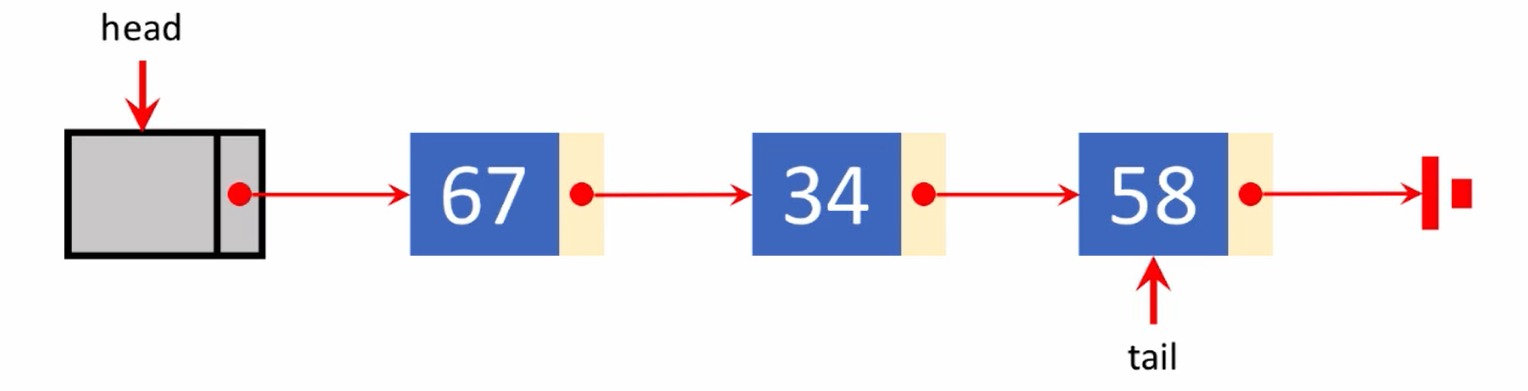

# 조금 변형된 연결 리스트
- 맨 앞에 dummy node를 추가한 형태로

In [227]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = None
        self.head.next = self.tail
    
    # 리스트 출력
    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'
        s = ''
        curr = self.head
        while curr is not None:
            s += repr(curr.data)
            if curr.next is not None:
                s += ' -> '
            curr = curr.next
        return s
    
    # 길이 리턴
    def getLength(self):
        return self.nodeCount
    
    # 리스트 순회
    def traverse(self):
        result = []
        curr = self.head
        while curr.next:
            curr = curr.next
            result.append(curr.data)
        return result
    
    # 특정 원소 참조
    def getAt(self, pos): # getAt(0) -> head
        if pos < 0 or pos > self.nodeCount:
            return None
        i = 0
        curr = self.head
        while i < pos:
            curr = curr.next
            i += 1
        return curr
    
    # 원소의 삽입
    def insertAfter(self, prev, newNode): # prev가 가리키는 node의 다음에 newNode를 삽입하고 성공/실패에 따라 True/False를 리턴
        newNode.next = prev.next
        if prev.next is None: # tail
            self.tail = newNode
        prev.next = newNode
        self.nodeCount += 1
        return True
    
    def insertAt(self, pos, newNode): # 1 <= pos <= nodeCount+1, pos가 가리키는 위치에 newNode를 삽입하고, 성공/실패에 따라 True/False를 리턴
        # (1) pos범위 조건 확인
        # (2) pos == 1인 경우에는 head뒤에 새 node 삽입
        # (3) pos == nodeCount + 1인 경우는 prev <- tail
        # (4) 그렇지 않은 경우에는 prev <- getAt(…)
        if pos < 1 or pos > self.nodeCount + 1:
            return False
        if pos != 1 and pos == self.nodeCount + 1: # pos가 1이면서 nodeCount+1과 같으면 빈 리스트에 노드를 삽입하는 경우
            prev = self.tail
        else: 
            prev = self.getAt(pos-1) # newNode가 삽입될 위치
        return self.insertAfter(prev, newNode)
    
    # 원소의 삭제
    def popAfter(self, prev): # prev의 다음 node를 삭제하고, 그 node의 data를 리턴
        if prev: # prev가 마지막 node일 때
            return None
        curr = prev.next
        prev.next = curr.next
        if curr.next is None:
            self.tail = prev
        self.nodeCount -= 1
        return curr.data
    
    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            raise IndexError
        prev = self.getAt(pos-1)
        return self.popAfter(prev)
        
    def concat(self, L):
        self.tail.next = L.head.next
        if L.tail:
            self.tail = L.tail
        self.nodeCount += L.nodeCount

In [242]:
a = Node(67)
b = Node(34)
c = Node(28)
L = LinkedList()

In [243]:
L

LinkedList: empty

In [244]:
L.insertAt(1, a)
L.insertAt(2, b)

True

In [245]:
L

None -> 67 -> 34

In [246]:
L.insertAt(1, c)
L

None -> 28 -> 67 -> 34

In [247]:
L.popAt(3)

34

In [248]:
L

None -> 28 -> 67